In [43]:
#library

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import random

import matplotlib.pylab as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)

torch.manual_seed(777)

if device == 'cuda':

    torch.cuda.manual_seed_all(777)

In [11]:
learning_rate = 0.001

training_epochs = 15

batch_size = 100

In [5]:
mnist_train = datasets.MNIST(root = 'MNIST_data/',
                             train = True,
                             transform = transforms.ToTensor(),
                             download = True)

mnist_test = datasets.MNIST(root = 'MNIST_data/',
                            train = False,
                            transform = transforms.ToTensor(),
                            download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 132931676.83it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24767060.69it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34497353.28it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15849025.60it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [6]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

# 3-linear relu model

In [7]:
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)

relu = torch.nn.ReLU()

In [8]:
#initialization

torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.0215, -0.0894,  0.0598,  ...,  0.0200,  0.0203,  0.1212],
        [ 0.0078,  0.1378,  0.0920,  ...,  0.0975,  0.1458, -0.0302],
        [ 0.1270, -0.1296,  0.1049,  ...,  0.0124,  0.1173, -0.0901],
        ...,
        [ 0.0661, -0.1025,  0.1437,  ...,  0.0784,  0.0977, -0.0396],
        [ 0.0430, -0.1274, -0.0134,  ..., -0.0582,  0.1201,  0.1479],
        [-0.1433,  0.0200, -0.0568,  ...,  0.0787,  0.0428, -0.0036]],
       requires_grad=True)

In [9]:
model = torch.nn.Sequential(linear1,relu,
                            linear2,relu,
                            linear3).to(device)

In [12]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
#training

total_batch = len(data_loader)

for epoch in range(training_epochs):

    avg_cost = 0

    for x,y in data_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        optimizer.zero_grad()

        hypothesis = model(x)

        cost = criterion(hypothesis, y)

        cost.backward()

        optimizer.step()

        avg_cost += cost/total_batch

    print('epoch:', '%04d' %(epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning finished')

epoch: 0001 cost =  0.246763036
epoch: 0002 cost =  0.093066528
epoch: 0003 cost =  0.061003156
epoch: 0004 cost =  0.043708097
epoch: 0005 cost =  0.032775719
epoch: 0006 cost =  0.025442224
epoch: 0007 cost =  0.021619247
epoch: 0008 cost =  0.018301070
epoch: 0009 cost =  0.015056375
epoch: 0010 cost =  0.013457117
epoch: 0011 cost =  0.013505858
epoch: 0012 cost =  0.012631116
epoch: 0013 cost =  0.010484267
epoch: 0014 cost =  0.011389917
epoch: 0015 cost =  0.008104536
Learning finished


In [14]:
#test

with torch.no_grad():

    x_test = mnist_test.test_data.view(-1,784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)

    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()

    print('accuracy:', accuracy.item())

    r = random.randint(0,len(mnist_test)-1)

    x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('label: ', y_single_data.item())
    single_prediction = model(x_single_data)

    print('prediction: ',torch.argmax(single_prediction,1).item())

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


accuracy: 0.9765999913215637
label:  8
prediction:  8


#5-layer relu model

In [15]:
linear1 = torch.nn.Linear(784,512,bias=True)
linear2 = torch.nn.Linear(512,512,bias=True)
linear3 = torch.nn.Linear(512,512,bias=True)
linear4 = torch.nn.Linear(512,512,bias=True)
linear5 = torch.nn.Linear(512,10,bias=True)

relu = torch.nn.ReLU()

In [16]:
#initialization weight

torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0579, -0.1055,  0.0272,  ...,  0.1036,  0.0291, -0.0746],
        [ 0.0528,  0.0494, -0.0059,  ..., -0.0951, -0.0887, -0.0129],
        [-0.0953, -0.0510,  0.1030,  ..., -0.0493, -0.0581, -0.0280],
        ...,
        [ 0.0631,  0.0917,  0.0690,  ..., -0.0746, -0.0798,  0.0231],
        [ 0.0937,  0.0521, -0.0346,  ...,  0.0432, -0.0982, -0.0107],
        [-0.0888, -0.0723,  0.0511,  ...,  0.0530, -0.0830,  0.0624]],
       requires_grad=True)

In [17]:
model = torch.nn.Sequential(linear1,relu,
                            linear2,relu,
                            linear3,relu,
                            linear4,relu,
                            linear5).to(device)

In [18]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
#training

total_batch = len(data_loader)

for epoch in range(training_epochs):

    avg_cost = 0

    for x,y in data_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        optimizer.zero_grad()

        hypothesis = model(x)

        cost = criterion(hypothesis, y)

        cost.backward()

        optimizer.step()

        avg_cost += cost/total_batch

    print('epoch:', '%04d' %(epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Learning finished')

epoch: 0001 cost =  0.211344868
epoch: 0002 cost =  0.089732938
epoch: 0003 cost =  0.061561082
epoch: 0004 cost =  0.049891740
epoch: 0005 cost =  0.039384641
epoch: 0006 cost =  0.033595834
epoch: 0007 cost =  0.029843729
epoch: 0008 cost =  0.027476830
epoch: 0009 cost =  0.022207461
epoch: 0010 cost =  0.020239962
epoch: 0011 cost =  0.021573247
epoch: 0012 cost =  0.018593315
epoch: 0013 cost =  0.017733689
epoch: 0014 cost =  0.017786151
epoch: 0015 cost =  0.018606637
Learning finished


In [20]:
#test

with torch.no_grad():

    x_test = mnist_test.test_data.view(-1,784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)
    correct_prediction = torch.argmax(prediction, 1) == y_test
    accuracy = correct_prediction.float().mean()

    print('accuracy:', accuracy.item())

    r = random.randint(0, len(mnist_test)-1)

    x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)


    print('label:', y_single_data.item())
    single_prediction = model(x_single_data)

    print('prediction:', torch.argmax(single_prediction,1).item())

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


accuracy: 0.9825000166893005
label: 5
prediction: 5


#using dropout

In [36]:
drop_prob = 0.3

In [37]:
linear1 = torch.nn.Linear(784,512,bias=True)
linear2 = torch.nn.Linear(512,512,bias=True)
linear3 = torch.nn.Linear(512,512,bias=True)
linear4 = torch.nn.Linear(512,512,bias=True)
linear5 = torch.nn.Linear(512,10,bias = True)

relu = torch.nn.ReLU()

dropout = torch.nn.Dropout(p = drop_prob) #dropout layer

In [38]:
#intialization

torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0498,  0.0584,  0.0563,  ...,  0.0289,  0.0733,  0.1058],
        [-0.0379, -0.0546,  0.0529,  ...,  0.0027, -0.0633,  0.0464],
        [-0.0846,  0.0860, -0.0490,  ...,  0.0045, -0.0127,  0.0388],
        ...,
        [-0.0440, -0.0321,  0.1003,  ...,  0.0024, -0.0759, -0.0544],
        [-0.1038,  0.0250,  0.0817,  ...,  0.0005,  0.0751, -0.0133],
        [ 0.0011,  0.0826, -0.0803,  ...,  0.0771,  0.0956, -0.0599]],
       requires_grad=True)

In [39]:
model = torch.nn.Sequential(linear1,relu,dropout,
                            linear2,relu,dropout,
                            linear3,relu,dropout,
                            linear4,relu,dropout,
                            linear5).to(device)

In [40]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [41]:
#training

total_batch = len(data_loader)

#적어도 dropout 있을때는 model.train()을 무조건 써야하나보네...
#없어도 써야하는줄?..
model.train() #using dropout mode

for epoch in range(training_epochs):

    avg_cost = 0

    for x,y in data_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        optimizer.zero_grad()

        hypothesis = model(x)

        cost = criterion(hypothesis, y)

        cost.backward()

        optimizer.step()

        avg_cost += cost/total_batch

    print('epoch:', '%04d' %(epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

print('Leanring finished')

epoch: 0001 cost =  0.747954369
epoch: 0002 cost =  0.667652667
epoch: 0003 cost =  0.798056722
epoch: 0004 cost =  0.772991121
epoch: 0005 cost =  0.724750936
epoch: 0006 cost =  0.714768827
epoch: 0007 cost =  0.672205925
epoch: 0008 cost =  0.721077204
epoch: 0009 cost =  0.624526441
epoch: 0010 cost =  0.664651155
Leanring finished


In [42]:
#test

with torch.no_grad():

    #test mode
    model.eval()

    x_test = mnist_test.test_data.view(-1,784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)

    correct_prediction = torch.argmax(prediction, 1) == y_test

    accuracy = correct_prediction.float().mean()

    print('accuracy:',accuracy.item())

    r = random.randint(0, len(mnist_test) - 1)
    x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('label:', y_single_data.item())
    single_prediction = model(x_single_data)
    print('prediction:',torch.argmax(single_prediction,1).item())

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


accuracy: 0.9218999743461609
label: 3
prediction: 3


#using batch normalization

In [44]:
learning_rate = 0.01
training_epochs = 10
batch_size = 32

In [45]:
train_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                           batch_size = batch_size,
                                           shuffle = True,
                                           drop_last = True)

test_loader = torch.utils.data.DataLoader(dataset = mnist_test,
                                          batch_size = batch_size,
                                          shuffle = False,
                                          drop_last = True)

In [46]:
linear1 = torch.nn.Linear(784,32,bias = True)
linear2 = torch.nn.Linear(32,32,bias = True)
linear3 = torch.nn.Linear(32,10,bias = True)

relu = torch.nn.ReLU()

#batch normalization

bn1 = torch.nn.BatchNorm1d(32)
bn2 = torch.nn.BatchNorm1d(32)

nn_linear1 = torch.nn.Linear(784,32,bias=True)
nn_linear2 = torch.nn.Linear(32,32,bias=True)
nn_linear3 = torch.nn.Linear(32,10,bias=True)

In [47]:
bn_model = torch.nn.Sequential(linear1, bn1, relu,
                               linear2, bn2, relu,
                               linear3).to(device)

nn_model = torch.nn.Sequential(nn_linear1, relu,
                               nn_linear2, relu,
                               nn_linear3).to(device)

In [48]:
criterion = torch.nn.CrossEntropyLoss().to(device)

bn_optimizer = torch.optim.Adam(bn_model.parameters(), lr = learning_rate)
nn_optimizer = torch.optim.Adam(nn_model.parameters(), lr = learning_rate)

In [49]:
#train & validation

train_losses = []
train_accs = []

valid_losses = []
valid_accs = []

train_total_batch = len(train_loader)
test_total_batch = len(test_loader)

#dropout, batch normalization이 있는 경우 반드시 써야하는듯
bn_model.train()

for epoch in range(training_epochs):

    for x,y in train_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        bn_optimizer.zero_grad()
        bn_prediction = bn_model(x)
        bn_loss = criterion(bn_prediction, y)
        bn_loss.backward()
        bn_optimizer.step()

        nn_optimizer.zero_grad()
        nn_prediction = nn_model(x)
        nn_loss = criterion(nn_prediction, y)
        nn_loss.backward()
        nn_optimizer.step()

    with torch.no_grad():

        bn_model.eval() #eval mode

        bn_loss, nn_loss, bn_acc, nn_acc = 0,0,0,0

        for i,(x,y) in enumerate(train_loader):

            x = x.view(-1,784).to(device)
            y = y.to(device)

            bn_prediction = bn_model(x)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == y
            bn_loss += criterion(bn_prediction, y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(x)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == y
            nn_loss += criterion(nn_prediction, y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss= bn_loss/train_total_batch, nn_loss/train_total_batch
        bn_acc, nn_acc = bn_acc/train_total_batch, nn_acc/train_total_batch

        #save train loss/acc
        train_losses.append([bn_loss, nn_loss])
        train_accs.append([bn_acc, nn_acc])

        print(
            '[Epoch %d-TRAIN] Batchnrom Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' %(
                (epoch+1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()
            )
        )

        #test the model using test sets

        bn_loss, nn_loss, bn_acc, nn_acc = 0,0,0,0

        for i,(X,Y) in enumerate(test_loader):

            X = X.view(-1,784).to(device)
            Y = Y.to(device)

            bn_prediction = bn_model(X)
            bn_correct_prediction = torch.argmax(bn_prediction, 1) == Y
            bn_loss += criterion(bn_prediction, Y)
            bn_acc += bn_correct_prediction.float().mean()

            nn_prediction = nn_model(X)
            nn_correct_prediction = torch.argmax(nn_prediction, 1) == Y
            nn_loss += criterion(nn_prediction, Y)
            nn_acc += nn_correct_prediction.float().mean()

        bn_loss, nn_loss = bn_loss/test_total_batch, nn_loss/test_total_batch
        bn_acc, nn_acc = bn_acc/test_total_batch, nn_acc/test_total_batch

        #save valid losses/acc
        valid_losses.append([bn_loss, nn_loss])
        valid_accs.append([bn_acc, nn_acc])
        print(
            '[Epoch %d-VALID] Batchnorm Loss(Acc): bn_loss:%.5f(bn_acc:%.2f) vs No Batchnorm Loss(Acc): nn_loss:%.5f(nn_acc:%.2f)' % (
                (epoch + 1), bn_loss.item(), bn_acc.item(), nn_loss.item(), nn_acc.item()
            )
        )
        print()

print('Learning finished')

[Epoch 1-TRAIN] Batchnrom Loss(Acc): bn_loss:0.13290(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.20013(nn_acc:0.94)
[Epoch 1-VALID] Batchnorm Loss(Acc): bn_loss:0.14221(bn_acc:0.95) vs No Batchnorm Loss(Acc): nn_loss:0.20781(nn_acc:0.94)

[Epoch 2-TRAIN] Batchnrom Loss(Acc): bn_loss:0.10547(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.18272(nn_acc:0.95)
[Epoch 2-VALID] Batchnorm Loss(Acc): bn_loss:0.13461(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.21399(nn_acc:0.94)

[Epoch 3-TRAIN] Batchnrom Loss(Acc): bn_loss:0.08168(bn_acc:0.98) vs No Batchnorm Loss(Acc): nn_loss:0.15012(nn_acc:0.96)
[Epoch 3-VALID] Batchnorm Loss(Acc): bn_loss:0.11412(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.18322(nn_acc:0.95)

[Epoch 4-TRAIN] Batchnrom Loss(Acc): bn_loss:0.08557(bn_acc:0.97) vs No Batchnorm Loss(Acc): nn_loss:0.18529(nn_acc:0.95)
[Epoch 4-VALID] Batchnorm Loss(Acc): bn_loss:0.13194(bn_acc:0.96) vs No Batchnorm Loss(Acc): nn_loss:0.23832(nn_acc:0.94)

[Epoch 5-TRAIN] Batc

In [50]:
def plot_compare(loss_list: list, ylim = None, title = None):

    bn = [i[0] for i in loss_list]
    nn = [i[1] for i in loss_list]

    plt.figure(figsize = (15,10))
    plt.plot(bn, label = 'With BN')
    plt.plot(nn, label = 'Without BN')

    if ylim:

        plt.ylim(ylim)

    if title:

        plt.title(title)

    plt.legend()
    plt.grid('on')
    plt.show()

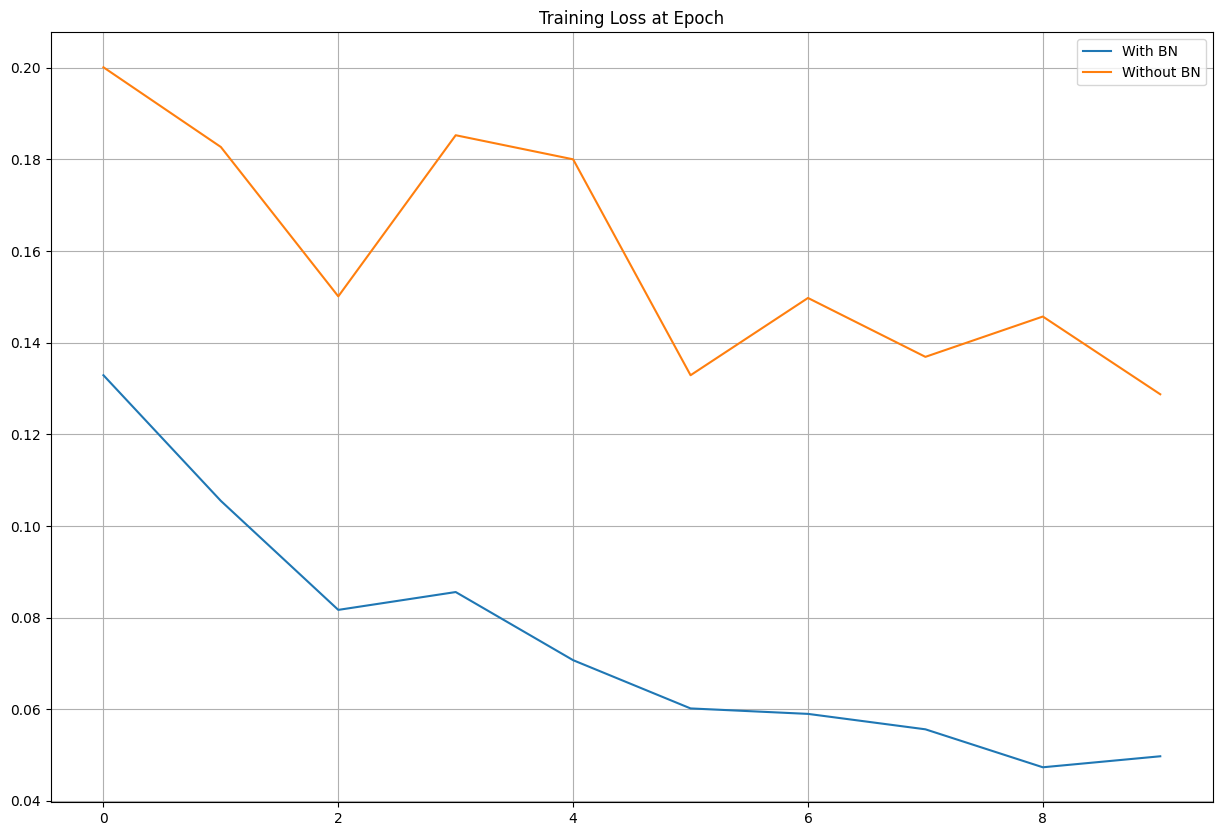

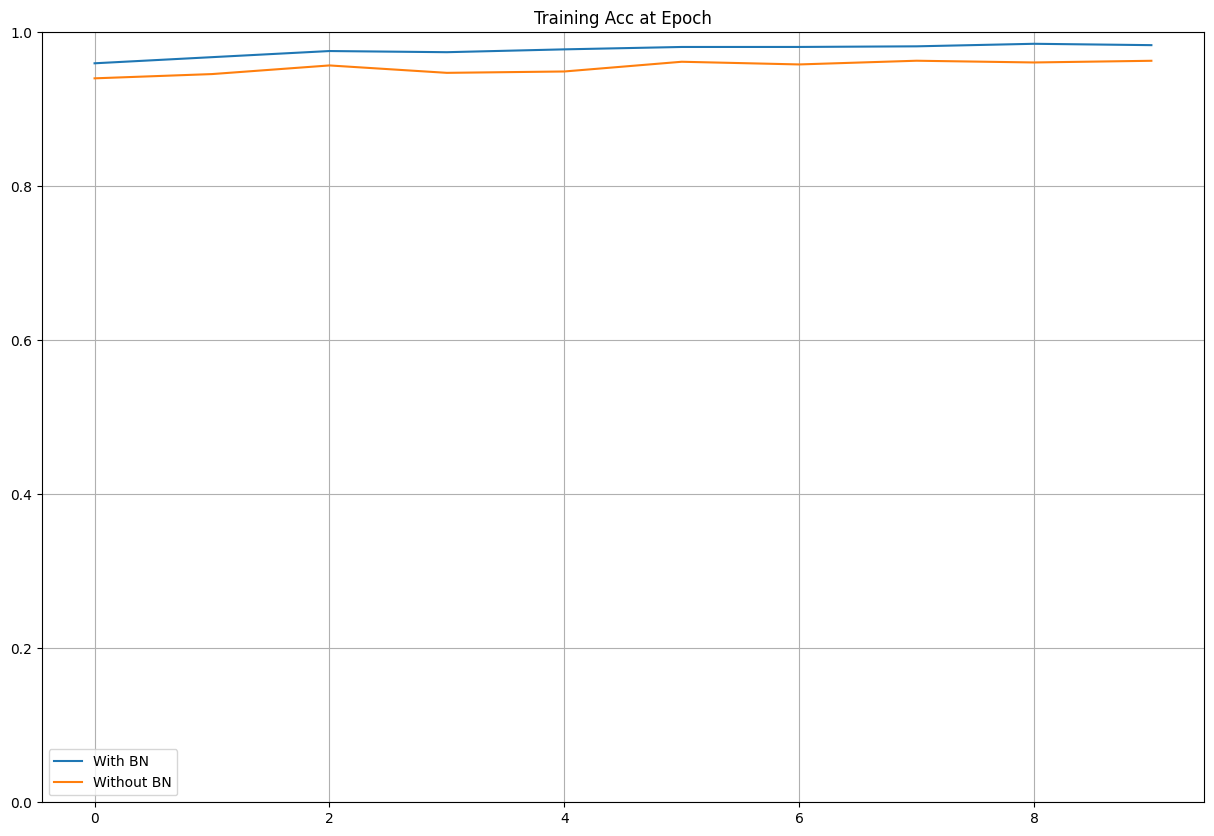

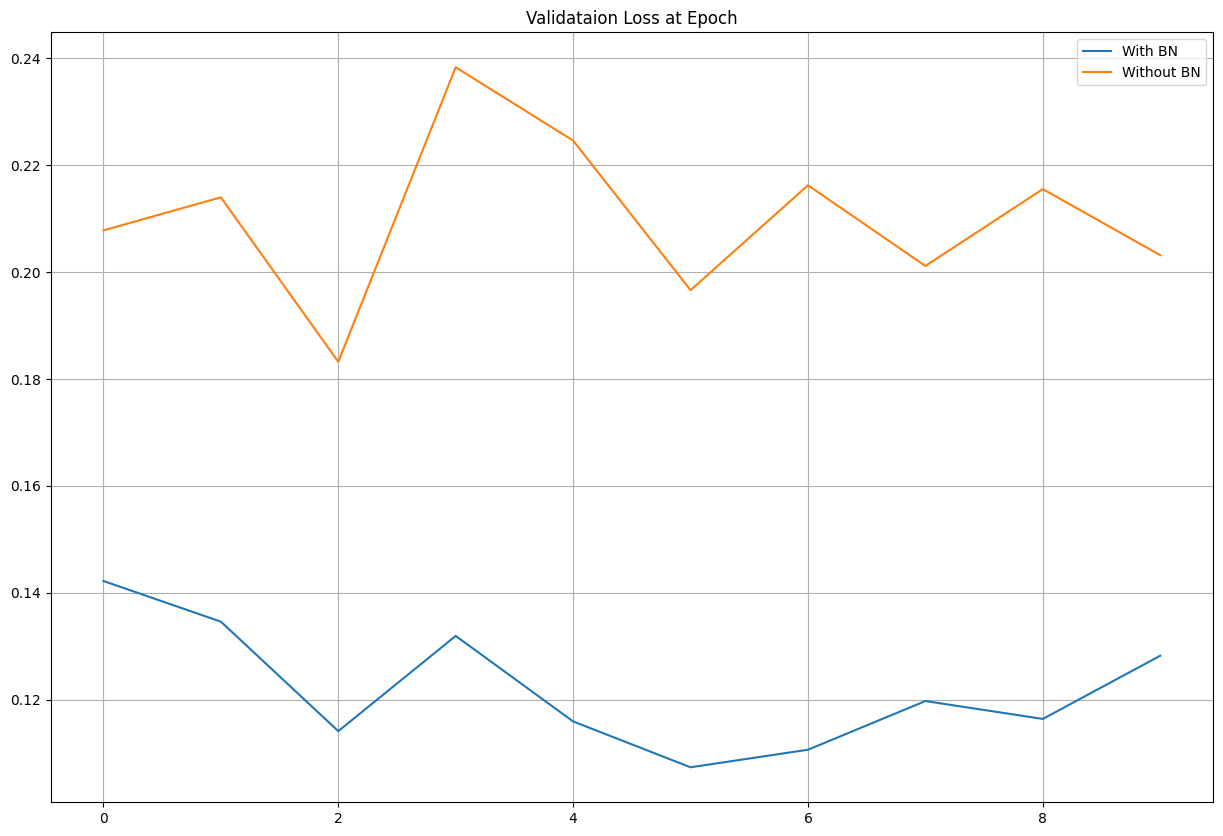

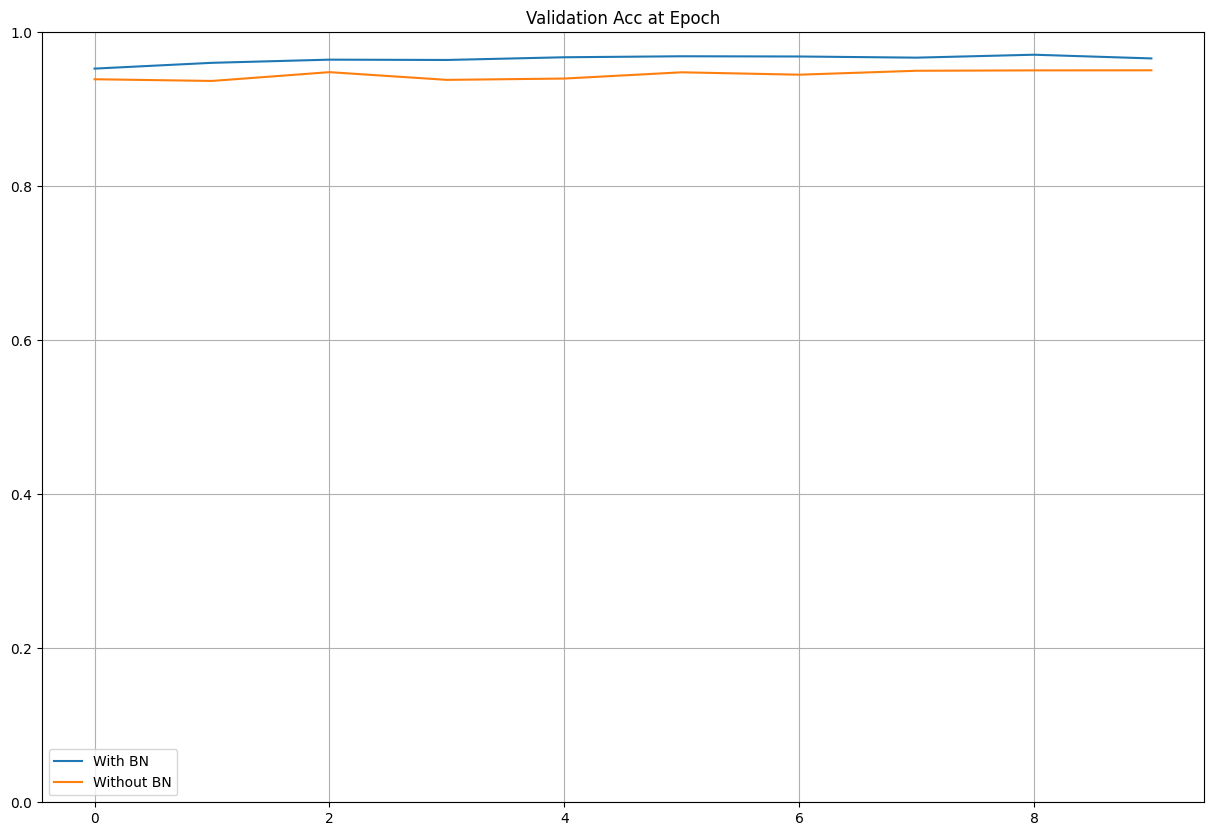

In [51]:
plot_compare(train_losses, title = 'Training Loss at Epoch')
plot_compare(train_accs, [0,1.0], title = 'Training Acc at Epoch')
plot_compare(valid_losses, title = 'Validataion Loss at Epoch')
plot_compare(valid_accs, [0,1.0], title = 'Validation Acc at Epoch')